## 順序統計量(order statictics)の例

$X_1, \cdots X_n , i.i.d. ～ U(0,1)$のとき, $X_1,X_2, \cdots$を昇順に並べた$X_{(1)},X_{(2)},\cdots,X_{(n)}$を順序統計量という. $X_{(j)}$の確率密度関数は
$$f_{X_{(j)}}(x) ～ Beta(j,n-j-1)$$

これから$U(0,1)$から生成した乱数20個×1000セットについて最大値,最小値,$i$番目の値の分布を求め, 順序統計量の理論と比較してみる.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

### 最大値, 最小値における実験

In [59]:
# シードを固定
np.random.seed(0)

n=20

# 乱数を生成
rand_set = np.random.random_sample([1000,n])
rand_set[0]

array([0.5488135 , 0.71518937, 0.60276338, 0.54488318, 0.4236548 ,
       0.64589411, 0.43758721, 0.891773  , 0.96366276, 0.38344152,
       0.79172504, 0.52889492, 0.56804456, 0.92559664, 0.07103606,
       0.0871293 , 0.0202184 , 0.83261985, 0.77815675, 0.87001215])

In [60]:
# 最大値,最小値を計算
mins = np.min(rand_set,axis=1)
maxs = np.max(rand_set,axis=1)

# 確率密度関数を計算
xscale = np.linspace(0,1,100)
prob_min = stats.beta.pdf(xscale,1,n-1+1)
prob_max = stats.beta.pdf(xscale,n,n-n+1)

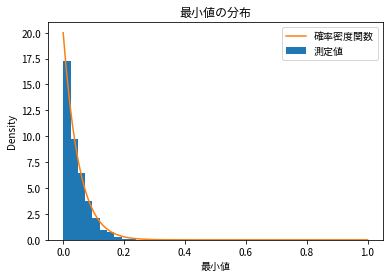

In [65]:
plt.figure()
plt.hist(mins,density=True,label="測定値")
plt.plot(xscale,prob_min,label="確率密度関数")
plt.title("最小値の分布")
plt.xlabel("最小値")
plt.ylabel("Density")
plt.legend()

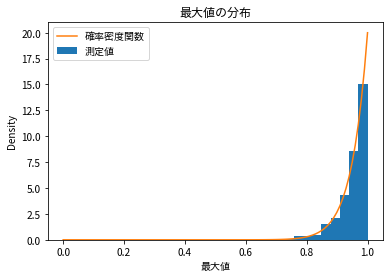

In [66]:
plt.figure()
plt.hist(maxs,density=True,label="測定値")
plt.plot(xscale,prob_max,label="確率密度関数")
plt.title("最大値の分布")
plt.xlabel("最大値")
plt.ylabel("Density")
plt.legend()

### $i$番目の値における実験

In [79]:
i = 6 #i番目の値

# セットごとにソート
rand_set_sorted = np.sort(rand_set, axis=1)
# i番目の値を取得
ith_num = rand_set_sorted[:,i-1]

In [84]:
# 確率密度関数を計算
xscale = np.linspace(0,1,100)
prob = stats.beta.pdf(xscale,i,n-i+1)

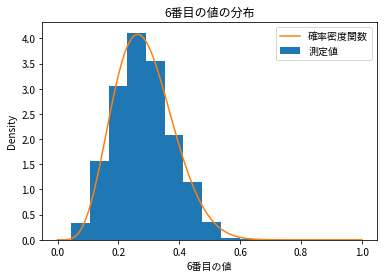

In [86]:
plt.figure()
plt.hist(ith_num,density=True,label="測定値")
plt.plot(xscale,prob,label="確率密度関数")
plt.title(str(i)+"番目の値の分布")
plt.xlabel(str(i)+"番目の値")
plt.ylabel("Density")
plt.legend()